In [1]:
#  импортируем необходимые пакеты
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from keras import models
from keras.preprocessing.image import ImageDataGenerator, load_img

In [5]:
#  загружаем предобученную модель
model = models.load_model(os.path.join(os.getcwd(), "face_recognition_v4"))

In [6]:
#  здаем путь до выборок. Обучающая выборка в последсвии потребуется
test_dir = os.path.join(os.getcwd(), "..", "data", "Final_project", "test")
train_dir = os.path.join(os.getcwd(), "..", "data", "Final_project", "train")

In [7]:
#  делаем рескейл
test_gen = ImageDataGenerator(rescale = 1./255)

In [8]:
#  задаем итератор для перебора тестового датасета
test_datagen = test_gen.flow_from_directory(test_dir,
                                            target_size=(48,48),
                                            batch_size=64,
                                            color_mode="grayscale",
                                            class_mode="categorical")

Found 7178 images belonging to 7 classes.


In [9]:
#  оцениваем качество
test_loss, test_accuracy = model.evaluate(test_datagen)
print(f"Estimated test loss = {test_loss:.5f}", 
      f"Estimated accuracy on test sample = {test_accuracy:.5f}",
      sep="\n")

113/113 [==============================] - 9s 78ms/step - loss: 1.1691 - accuracy: 0.5736
Estimated test loss = 1.16908
Estimated accuracy on test sample = 0.57356


In [10]:
print(f"Model 'face_recognition_v1' estimated with test loss = 1.39057 and accuracy = 0.55419")
print(f"Model 'face_recognition_v2' estimated with test loss = 1.24788 and accuracy = 0.5468")
print(f"Model 'face_recognition_v3' estimated with test loss = 1.28397 and accuracy = 0.53274")
print(f"Model 'face_recognition_v3' estimated with test loss = {test_loss:.5f} and accuracy = {test_accuracy:.5f}")

Model 'face_recognition_v1' estimated with test loss = 1.39057 and accuracy = 0.55419
Model 'face_recognition_v2' estimated with test loss = 1.24788 and accuracy = 0.5468
Model 'face_recognition_v3' estimated with test loss = 1.28397 and accuracy = 0.53274
Model 'face_recognition_v3' estimated with test loss = 1.16908 and accuracy = 0.57356


In [11]:
#  качетво на каждой модели плюс минус но различается. В папке graphs есть графики потерь и качества при обучении каждой модели
#  кроме первой....первую не сохранил и в итоге история не сохранилсь....хотя мне казалось что при выхове сохраненной модели
#  история должна по потерям и метрике так же должна оставаться....ну не суть, там особо не различаются графики
#  в итоге выбор падает на последнюю модель...у нее самый лучший показатель по метерике....при этом модель сама проще чем три
#  предыдущие

In [12]:
#  сделаем словарь с итоговыми лейблами из тестового датасета
label_dict = {k:v for k, v in enumerate(os.listdir(test_dir))}
label_dict

{0: 'angry',
 1: 'disgusted',
 2: 'fearful',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprised'}

surprised label have been chosen


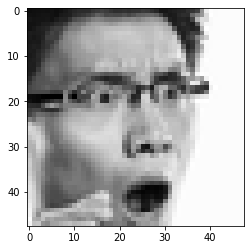

Model predict surprised label
Model predict True label
================================================== NEXT IMAGE ==================================================
surprised label have been chosen


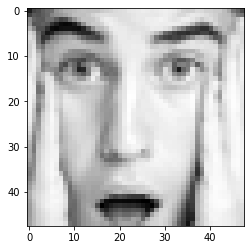

Model predict surprised label
Model predict True label
================================================== NEXT IMAGE ==================================================
angry label have been chosen


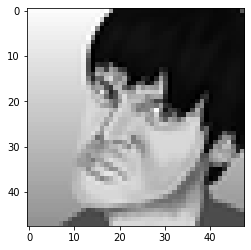

Model predict neutral label
Model predict False label
================================================== NEXT IMAGE ==================================================
happy label have been chosen


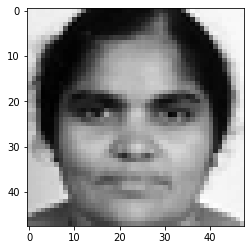

Model predict neutral label
Model predict False label
================================================== NEXT IMAGE ==================================================
happy label have been chosen


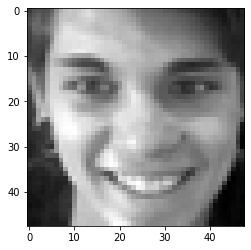

Model predict happy label
Model predict True label
================================================== NEXT IMAGE ==================================================
sad label have been chosen


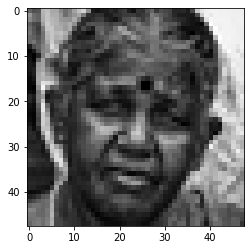

Model predict neutral label
Model predict False label
================================================== NEXT IMAGE ==================================================
neutral label have been chosen


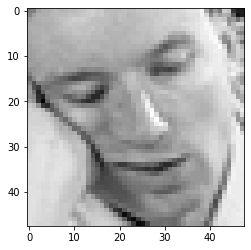

Model predict sad label
Model predict False label
================================================== NEXT IMAGE ==================================================
disgusted label have been chosen


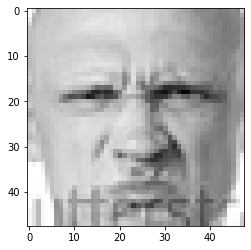

Model predict angry label
Model predict False label
================================================== NEXT IMAGE ==================================================
fearful label have been chosen


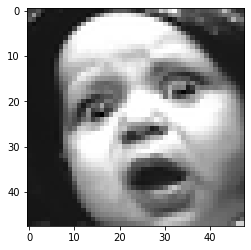

Model predict surprised label
Model predict False label
================================================== NEXT IMAGE ==================================================
angry label have been chosen


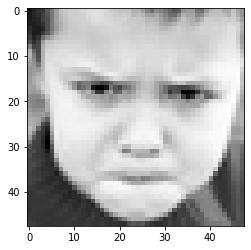

Model predict angry label
Model predict True label
================================================== NEXT IMAGE ==================================================


In [13]:
#  для примера делаем 10 предсказаний по всей тейстовой выборке.
for i in range(10):
    label_choice = np.random.choice(len(label_dict))
    print(f"{label_dict[label_choice]} label have been chosen")
    photo_choice = np.random.choice(os.listdir(os.path.join(test_dir, label_dict[label_choice])))
    photo_path = os.path.join(test_dir, label_dict[label_choice], photo_choice)
    img = load_img(photo_path, target_size = (48,48), color_mode = "grayscale")
    img = np.array(img)
    img = img.astype('float32')
    img /= 255
    plt.imshow(img, cmap="gist_gray")
    plt.show()
    
    img = np.expand_dims(img,axis = 0)
    img = img.reshape(1,48,48,1)
    result = model.predict(img)
    predict_label = label_dict[np.argmax(result[0])]
    print(f"Model predict {predict_label} label")
    print(f"Model predict {predict_label == label_dict[label_choice]} label")
    print("="*50, "NEXT IMAGE", "="*50)

In [14]:
#  чтож модели предсказывают и в ходе работ была замечена следующая закономерность. 
#  лучше всего модель предсказывает лейблы angry и happy, скорее всего это связано с довольно явным выражением эмоций по этим лейблам
#  очень часто модель путает angry и digusted, happy и surprised....так же было замечено, что в случаях неявных эмоций, когда 
#  нет ярко выраженной мимики, то модель дает предсказания neutral. Так же хочу отметить сам датасет и его разметку. 
#  Чуть ниже я еще опишу как модель принимает решения, но так же это описано по первой модели и можно почитать это
#  в дирректории Final_project\graphs\1._image_plot_model_v1_comments.txt
#  Сами картинки имеют разрешение 48х48.....что очень мало, забегая вперед могу сказать, что я позже для тестирования приложения
#  на фласке из интернета брал картинки лиц и обрезал их.....но при уменьшении размерности очень сильно страдает входное пространсто, 
#  поэтому не удивительно что в итоге получается такой результат.
#  плюс есть некоторые вопросы к разметке, частично я описал это ниже, 
#  частично в файле с комментариями к графику 1._image_plot_model_v1.jpg

In [15]:
#  сделаем следующее...посмотрим метрику в разрезе всех лейблов. Сделаем датафрейм средсказаниями
labels_errors = pd.DataFrame()
for label in list(label_dict.values()):
    label_dir = os.path.join(test_dir, label)
    predicted_elements = {k: int() for k in label_dict.values()}
    for photo in os.listdir(label_dir):
        photo_path = os.path.join(label_dir, photo)
        img = load_img(photo_path, target_size = (48,48), color_mode = "grayscale")
        img = np.array(img)
        img = img.astype('float32')
        img /= 255  
        img = np.expand_dims(img,axis = 0)
        img = img.reshape(1,48,48,1)
        result = model.predict(img)
        predict_label = label_dict[np.argmax(result[0])]
        predicted_elements[predict_label] += 1
    predicted_elements = pd.DataFrame(predicted_elements, index=[label])
    labels_errors = labels_errors.append(predicted_elements)

In [33]:
#  посчитаем количество всех примеров для каждого лейбла
labels_errors["total"] = labels_errors.apply(sum, axis=1)

In [35]:
#  посчитаем метрики для каждого лейбла
labels_errors["accuracy_per_label"] = 0
for label in labels_errors.index:
    labels_errors.loc[label, "accuracy_per_label"] = labels_errors.loc[label, label] / labels_errors.loc[label, "total"]

In [36]:
labels_errors

,angry,disgusted,fearful,happy,neutral,sad,surprised,total,accuracy_per_label
angry,443,3,38,67,221,148,38,958,0.462422
disgusted,52,17,1,10,7,21,3,111,0.153153
fearful,164,3,208,67,236,205,141,1024,0.203125
happy,46,0,23,1476,115,64,50,1774,0.832018
neutral,68,1,29,121,862,130,22,1233,0.699108
sad,103,1,84,129,417,496,17,1247,0.397755
surprised,28,0,61,45,68,14,615,831,0.740072


In [ ]:
#  как видно из фрейма, лучше всего как и озвучивал ранее, определяется angry, happy, surprised. Как и говорил связано 
#  скорее всего это с тем, что выражения лиц при таких эмоциях достаточно очевидны и легко читаются в виде направления уголков
#  губ, формы бровей, открытого рта и т.д.
#  Nreutral на мой взгляд не нужно считать лейблом с хорошей мтерикой, потому что как уже говорил neutral для модели это
#  что-то что она предсказывает, когда не знает что предсказывать. Типо такой корзины, куда кидается все то, что непонятно
#  если посмотреть, то по этому лейблу как раз проходят самые осноные ошибки других лейблов

#  что касается лейбла angry. Тут ситуация не самая хорошая конечно, но почти половину определяет. больша часть ошибок как раз 
#  сосредоточена в neutral лейбле....тут как раз есть вопросы к разметке датасета в файле 1._image_plot_model_v1_comments.txt
#  как раз описана ситуация кривой разметки по этому лейблу
#  
#  disgusted самый сложный с точки зрения предсказаний, поскольку по тем фото, что я видел по этому лейблу, 
#  эмоции оцень сильно коррелируют со злостью чем с отвращением....поэтому такая предсказательная сила в виде смещения в сторону angry
#  
#  fearful тоже сложная в предсказании эмоция и выделить какие-то отдельные патерны выражений сложно. Если посмотреть на размеченный
#  сет то там такие разные выражения лиц, и самому достаточно слложно понять как их можно взаимоувязать
#  к тому же по части разметки я не согласен впринципе
# 
#  с happy все понятно, тут как раз обратная ситуация, паттерн счастливого лица очень просто выделить, это всего лишь геометрия
#  углков губ направленных вверх
# 
#  с sad ситуация сложная, поскольку половину модель определяет, а половину кидает в neutral, что по сути означает, что модель 
#  не знает что за эмоция...ну и с разметкой к этому лейблу тоже возникали вопросы
# 
#  с surprised все вполне неплохо,  но тут как раз как с happy есть явный паттерн выражения. Широко раскрытые глаза, 
#  скорее всего открытый рот и геометрия бровей, в виде приподятых внутренних их частей.
# 
#  по итогу модель хорошо предсказывает 3 класса из 7, один более-менее и 3 совсем плохо..

In [37]:
# попробуем посмотреть на основании чего модель принимает такие решения

In [16]:
import shap

In [17]:
background = []
for label in label_dict.values():
    for el in range(100):
        photo = np.random.choice(os.listdir(os.path.join(train_dir, label)))
        photo_path = os.path.join(train_dir, label, photo)
        img = load_img(photo_path, target_size = (48,48), color_mode = "grayscale")
        img = np.array(img)
        img = img.astype('float32')
        img /= 255
        img = np.expand_dims(img,axis = 2)
#         img = img.reshape(1, 48, 48, 1)
        background.append(img)
background = np.array(background)

In [18]:
e = shap.GradientExplainer(model, background)
#  использую градиент експлейнер, потому что какая-то засада с увязкой шапа и дипэксплейнера
#  нашел на гитхабе только такое обсуждение https://github.com/slundberg/shap/issues/1055 в котором ребята тоже обсудали 
#  исключения которые дает шап с увязкой tf в версии выше двух.
#  кто-то пишет что у него никакой эексплейнер не работает, кто-то пишет что можно в настройках tf покопаться....но мне это не помогло
#  у меня даже тот код что приведен в документации в качестве примера не работает....поэтому пока как-то так((
#  в итоге решил остановиться на градиент экспленере. Но насколько я понимаю суть его работы, он будет отражать только
#  те слои, которые имеют дифференцируемые функции потерь....в нашей модели это четыре последних полносвязанных сллоя
#  сверточные слои он учитывать не будет, а DeepExplainer вроде как работает и со сверткой

In [19]:
shap_test = []
for label in label_dict.values():
    photo = np.random.choice(os.listdir(os.path.join(train_dir, label)))
    photo_path = os.path.join(train_dir, label, photo)
    img = load_img(photo_path, target_size = (48, 48), color_mode = "grayscale")
    img = np.array(img)
    img = img.astype('float32')
    img /= 255
    img = np.expand_dims(img,axis = 2)
#     img = img.reshape(1, 48, 48, 1)
    shap_test.append(img)
shap_instances = np.array(shap_test)

In [20]:
shap_values = e.shap_values(shap_instances)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


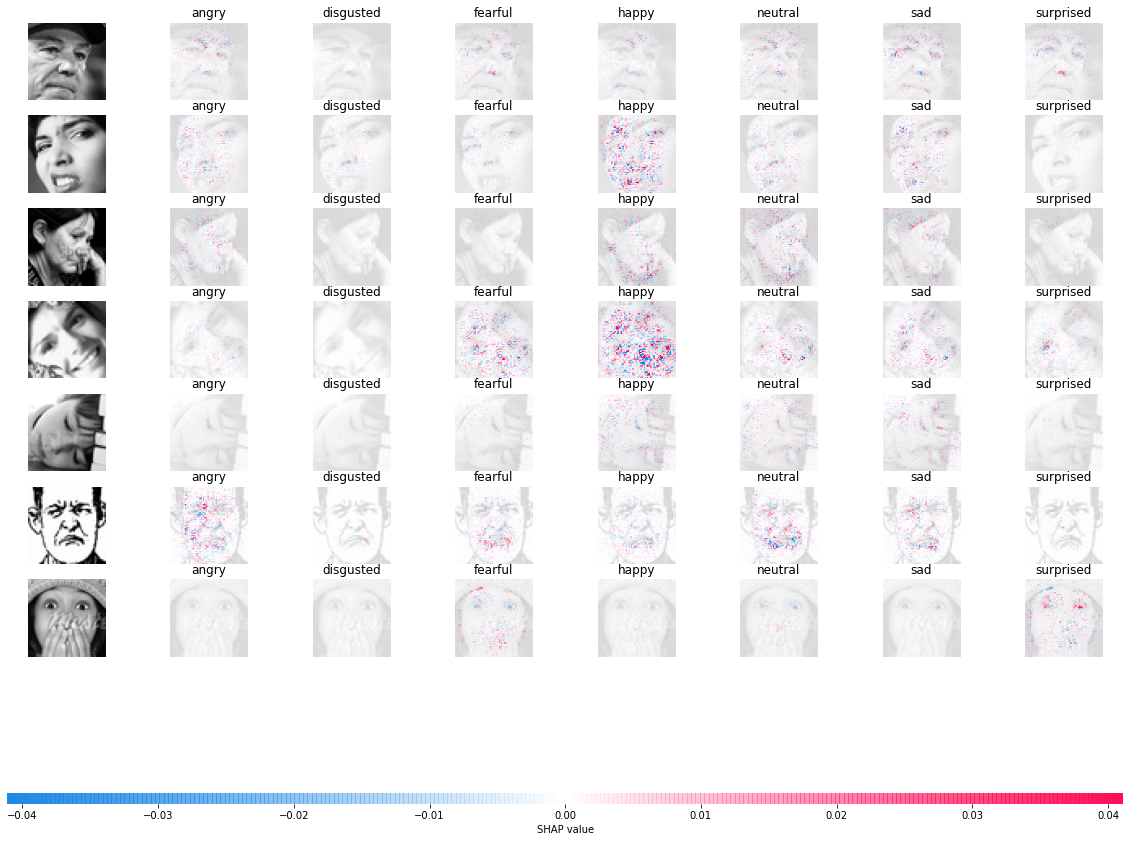

In [21]:
shap.image_plot(shap_values, shap_instances, show=False, labels=[list(label_dict.values()) for i in range(7)])
plt.savefig("./graphs/image_plot_model_v4.jpg")

In [ ]:
#  чуть ниже код с предсказаниями и реальнымми лейблами. на самом графике первая колонка - это реальные изображения,
#  остальные колонки предсказания разных лейблов. Я к сожалению не понял как оставить только предсказанные лейблы, поэтому пока в таком вот виде
# 
#  Первая картинка, модель предсказывает sad по факту angry. И тут вопрос к разметке..я лично тоже глядя на эту картинку думаю
#  что у человек скорее озаачен чем зол. Если сомтреть на шап оценки, то видно что концентрация основных красных точек в районе глаз
#  и в районе уголков рта, поэтому в принципе я тут скорее согласен с моделью нежели с разметкой))
# 
#  Вторая картинка предсказано happy по факту disgusted. Ну тут сложно сказать почему модель выбрала такой лейбл...но судя по шап
#  оценкам основная ориентация была на форму рта и геометрию щек
# 
#  Третья картинка предсказано neutral, по факту fearful, это как раз тот момент когда модель не знает что предсказывать 
#  и сваливает все в neutral. Видно как раз по шап оценкамм, которые никаким образом не сконцентрированы нигде, а равномерно рассеяны.
# 
#  четверая картина предсказано и реальный лейбл happy. Тут как раз видны концентрическе красные точки вокруг рта и глаз
# 
#  пятая картинка предсказано sad по факту neutral. Честно сказать не могу почему модель выбрала именно эту категорию. По шап 
#  оценкам это явно не видно...возможно проблема в певернутом изображении...хотя на трейн мы подавали итератор картинок с опцией обрезки/переворачивания/увеличения
#  кстати возможно это было ошибкой...надо было бы оставить только поворачивание картинки, а все остальное убрать, в виду того
#  что наши исходные данные и так малы....а я еще их обрезал и увеличивал.....там явно не будет какой-либо более ценной информации
#  но я к сожалению это осознал только чейчас когда уже все готово, поэтому переделывать не буду....пусть будет как есть))
# 
#  шетая картинка предсказано angry по факту sad...и тут опять вопрос к разметке....я больше склонен к выбору модели чем к разметке
#  ну и по шап оценкам видно что решение принято на основании геометрии окологлазных морщин
# 
#  седьмая картинка предсказано surprised и по факту так оно и есть. Ну тут тоже все понятно, по шап моддели видно
#  что решение приянто на основании геометрии открытых глаз....поскольку там сконцентрированы большинство красных точек


In [22]:
for label, img in enumerate(shap_test):
    img = img.reshape(1, 48, 48, 1)
    result = model.predict(img)
    predict_label = label_dict[np.argmax(result[0])]
    predicted_index = list(label_dict.values()).index(predict_label)
    print(f"Model predict {predict_label} label index {predicted_index}. True label is {label_dict[label]} index {label}")
    print(f"Model predict {predict_label == label_dict[label]} label")
    print("="*50, "NEXT IMAGE", "="*50)

Model predict sad label index 5. True label is angry index 0
Model predict False label
================================================== NEXT IMAGE ==================================================
Model predict happy label index 3. True label is disgusted index 1
Model predict False label
================================================== NEXT IMAGE ==================================================
Model predict neutral label index 4. True label is fearful index 2
Model predict False label
================================================== NEXT IMAGE ==================================================
Model predict happy label index 3. True label is happy index 3
Model predict True label
================================================== NEXT IMAGE ==================================================
Model predict sad label index 5. True label is neutral index 4
Model predict False label
================================================== NEXT IMAGE ====================================

### PS  
после всех уже манипуляций смотрю на архитектуру сети и думаю что она не совсем оптимальная, помимо косяка со сдвигами и увеличением при обучении, мне кажется архитектурно я тоже не совсем правильно поступил. Первый слой принимает изображения 48х48
при этом слой снимает 8 фильтров размерности 5х5. И по идее из 48х48=2304 пикселей...я фильтрую только 25х8= 200. Возможно в этом ошибка тоже